In [3]:
import matplotlib.pyplot as plt
import numpy as np

from gmt.objects import Interval, Cube, Ball
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Polygon, Ellipse



In [4]:
class rotation:
    def __init__(self,a):
        self.R = np.array([[np.cos(a), -np.sin(a)],[np.sin(a),np.cos(a)]])
             
    def __call__(self,x):
        return x @ self.R.T

def defaults(ax):
    try:
        for a in ax:
            a.set_aspect("equal")
            a.axis("off")
    except:
        ax.set_aspect("equal")
        ax.axis("off")
    return ax
        
        

In [5]:
rotate_45 = rotation(-np.pi/4)

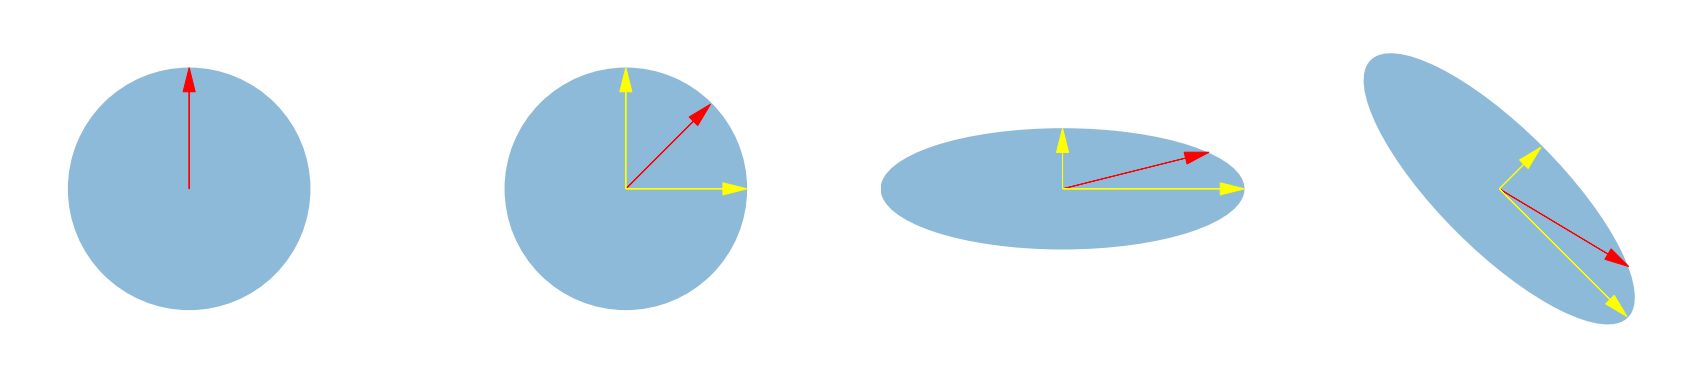

In [10]:
fig, ax = plt.subplots(1,4, figsize = (30,10))
defaults(ax)

axwidth = 1.5
for a in ax:
    a.set_xlim([-axwidth,axwidth])
    a.set_ylim([-axwidth,axwidth])

for a in ax[:2]:
    Ball([0,0],1).plot(a, alpha=.5)


head_width = .1
ax[0].arrow(0,0,0,.8,head_width=head_width, head_length=0.2, color="red")

ax[1].arrow(0,0,np.sqrt(1/2)-.15,np.sqrt(1/2)-.15,head_width=head_width, head_length=0.2, color="red")

ax[1].arrow(0,0,0,.8,head_width=head_width, head_length=0.2, color="yellow")
ax[1].arrow(0,0,.8,0,head_width=head_width, head_length=0.2, color="yellow")



e = Ellipse((0,0), 3, 1, angle=0, alpha=.5)

arrow = np.array([2*(np.sqrt(1/2)-.2),(1/2)*(np.sqrt(1/2)-.2)])
ax[2].add_patch(e)
ax[2].arrow(0,0,arrow[0],arrow[1],head_width=head_width, head_length=0.2, color="red")
arrow = rotate_45(arrow)

ax[2].arrow(0,0,0,.3,head_width=head_width, head_length=0.2, color="yellow")
ax[2].arrow(0,0,1.3,0,head_width=head_width, head_length=0.2, color="yellow")

e = Ellipse((0,0), 3, 1, angle=-45, alpha=.5)
ax[3].add_patch(e)
ax[3].arrow(0,0,arrow[0],arrow[1],head_width=head_width, head_length=0.2, color="red")

ax[3].arrow(0,0,1.8*(np.sqrt(1/2)-.2),-1.8*(np.sqrt(1/2)-.2),head_width=head_width, head_length=0.2, color="yellow")
ax[3].arrow(0,0,.4*(np.sqrt(1/2)-.2),.4*(np.sqrt(1/2)-.2),head_width=head_width, head_length=0.2, color="yellow")




# 


Text(0.6, 0.18, '$\\lambda_{1}a$')

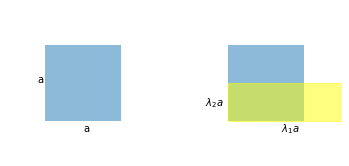

In [11]:
fig, ax = plt.subplots(1,2)


defaults(ax)

for a in ax:
    a.set_xlim=([0,1])
    a.set_ylim=([0,1])
    a.add_patch(Rectangle((.25,.25),.5,.5, alpha = .5))
    
ax[0].text(.2,.5,"a")
ax[0].text(.5,.18,"a")
    
a.add_patch(Rectangle((.25,.25),.75,.25, alpha = .5, color="yellow"))

ax[1].text(.1,.35,r"$\lambda_{2}a$")
ax[1].text(.6,.18,r"$\lambda_{1}a$")
    


    

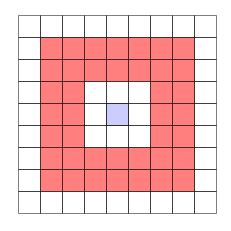

In [12]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.axis("off")
ax.set_xlim([-.5,.6])
ax.set_ylim([-.5,.6])
square =Cube([[0,1/9],[0,1/9]])
square.plot(ax=ax, alpha=.2, edgecolor="black", facecolor="blue", linewidth=1)
for Q in (9*square).children(9):
    if (3*Q).intersect(3.1*square) and not (2*Q).intersect(square):
        Q.plot(ax=ax, alpha=.5, edgecolor="black", facecolor="red", linewidth=1)
    else:
        Q.plot(ax=ax, alpha=.5, edgecolor="black", facecolor="none", linewidth=1)
    
# if Q.intersect((2/5)*unit_square):
#     plot_cube(Q,ax=ax, alpha=.5, edgecolor="black", facecolor="None", linewidth=1)
# elif [.5,.5] in Q:
#     plot_cube(Q,ax=ax, alpha=.5, edgecolor="black", facecolor="white")
# else:
#     plot_cube(Q,ax=ax, alpha=.5, edgecolor="black", facecolor="gray")
        

    

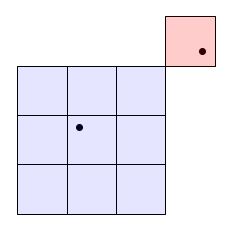

In [13]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.axis("off")
Q = Cube([[1/5,2/5],[1/5,2/5]])
R = Cube([[3/5,4/5],[3/5,4/5]])

for I in (3*Q).children(3):
    I.plot(ax=ax, edgecolor="black", facecolor="None")
    I.plot(ax=ax, alpha=.1, edgecolor="black", facecolor="blue")
    

R.plot(ax, edgecolor="black", facecolor="None")
R.plot(ax, alpha=.2, edgecolor="black", facecolor="red")

ax.scatter(Q.x[0]-.05,Q.x[1]+.05, color="black")
ax.scatter(R.x[0]+.05,R.x[1]-.04, color="black")


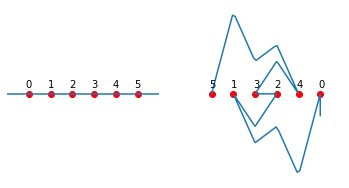

In [14]:
#The following class takes a 
#function defined on a finite
#set of points and gives a call function
#that will equal the piecewise linear
#interpolation of f. 

class interpolate:
    #We initiate the class with two
    #vectors x and f, where 
    #f is our function evaluated 
    #along the points x.
    def __init__(self,x,f):
        
        self.x=x
        
        self.f=f
        
    def __call__(self,y):
        
        j=0
        
        y = np.array(y)
        
        f=self.f
        
        x=self.x
        
        #This is where we will stash the values
        #of our interpolation evaluated at the 
        #points y.
        F = np.zeros(len(y))
        
        for i in range(len(self.x)-1):
            #For each consecutive pair of points
            #x_1 and x_2 in x, we compuite the slope of the line
            #passing from (x_1,f(x_1)) to (x_2,f(x_2))
            #and then define a function for that secant line.
            
            m = (f[i+1]-f[i])/(x[i+1]-x[i])
            
            line = lambda t: m*(t-x[i]) + f[i]
            
            #We then define F on the points in y
            #that lie between these two points to
            #equal to this line.
            
            indices = ((y>=x[i]) & (y<=x[i+1]))
            F[indices] = line(y[indices])
            
        #For the values of y that came before 
        #the first element in x or afte the
        #last, we just set F equal to the 
        #first and last values of f
        #respectively.
        
        F[y<=x[0]] = f[0]
        
        F[y>=x[-1]] = f[-1]
        
        return F
    
    
#This defines the MacManus extension
#operator.

class Macmanus:
    def __init__(self,x,f):
        #The initial arguments are numbers x
        #and their values f under the function
        #we want to extend. We first convert
        #them to numpy arrays
        
        x = np.array(x)
        
        f=np.array(f)
        
        self.m=len(x)
        
        assert (self.m,)==x.shape, "x must be 1 dimensional"

        #Next, we define the extension classes
        #for f and its inverse,, which we call
        #f_1 and f_2 respectively. 
        
        self.f_1 = interpolate(x,f)
        
        #Note that the interpolation
        #class assumes that the x variable
        #is ordered from smallest to largest,
        #so we can't just pass the pair
        #(f,x) as the initial input, we
        #need to reorder the numbers so that
        #f is now increasing.
        
        i = np.argsort(f)
        
        self.f_2 = interpolate(f[i],x[i])
    
    def __call__(self,x):
        
        #This will evaluate the MacManus
        #extension at an array of points x.
        #If x is a list, we convert it to
        #a numpy array.
        
        x = np.array(x)
        
        #If m is the number of values 
        #in x, the following is a 
        #mx2 array where we will store
        #the m values of the MacManus 
        #extension (now 2-d vectors),
        #the columns being the x and 
        #y coordinates respectively.
        
        ext = np.zeros((len(x),2))
        
        #We now define these coordinates
        #as per the definition of the
        #MacManus extension
        
        f_1 = self.f_1(x)
        
        ext[:,0] = f_1
        
        ext[:,1] = x-self.f_2(f_1)
    
    
            
        return ext
                
        
#Now let's try an example.
#Below are some numbers x
#and the values of a Lipschitz
#function f evaluated at these 
#points. We'll plot what the 
#image of the real line looks
#like under the extension

            
x= np.array([0,1,2,3,4,5])

f = [5,1,3,2,4,0]

F = Macmanus(x,f)

y=np.linspace(-1,5,200)

Z=F(y)

fig, ax = plt.subplots(1,2)

for a in ax:
    a.set_xlim([-1,6])
    a.set_ylim([-4,4])
    a.set_aspect("equal")
    a.axis("off")
    

ax[0].scatter(np.arange(0,6), np.zeros(6), color="red")
ax[0].plot([-1,6],[0,0], color=u'#1f77b4')
[ax[0].text(i-.15,.3,i) for i in range(0,6)]
ax[0].axis("off")


    
ax[1].plot(Z[:,0], Z[:,1])
ax[1].scatter(f,np.zeros(len(f)), color="red")
# ax[0].set_xlim([-6,4])
# ax[0].set_ylim([-3,2])
for i in x:
    _=ax[1].text(f[i]-.1,.3,i)





